### Objectif
Collecter le tableau des Films: https://www.imdb.com/chart/top?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=4da9d9a5-d299-43f2-9c53-f0efa18182cd&pf_rd_r=WVCW3T0WDNE7BW4AGN3R&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=boxoffice&ref_=chtbo_ql_3

### Importer les librairies
Tout d'abord, nous importerons les librairies dont nous aurons besoin afin que nous puissions les utiliser pour nous aider à construire notre scraper et à obtenir les données dont nous avons besoin.

In [2]:
import pandas as pd
import numpy as np

### Demander le contenu de l'URL
Obtenez le contenu de la page que nous regardons en demandant l'URL:

In [3]:
# On spécifie l'adresse url du site web 
url = 'https://www.imdb.com/chart/top?pf_rd_m=A2FGELUUNOQJNL&pf_rd_p=4da9d9a5-d299-43f2-9c53-f0efa18182cd&pf_rd_r=WVCW3T0WDNE7BW4AGN3R&pf_rd_s=right-4&pf_rd_t=15506&pf_rd_i=boxoffice&ref_=chtbo_ql_3'

In [6]:
# Pour voir si la requête a réussi, après avoir exécuté le code avec l’url:
# Une réponse [200] signifi un accès possible. 
# Une réponse [404] signifi un accès impossible
from bs4 import BeautifulSoup 
import requests 
page = requests.get(url)
print (page)

<Response [200]>


# Inspecter le HTML
Pour examiner la structure HTML de n'importe quelle page, on clique avec le bouton droit de la souris et on  appui sur l'option **Inspecter**.

In [9]:
soup = BeautifulSoup(page.text, 'lxml')
#soup

### Trouvez la bon balise
- Il est temps de consulter le code HTML sur notre page Web.
- Accédez à la page Web que nous grattons, inspectez-la et survolez le tableau de données (clique droit sur le tableau et choisissez **inspecter**)
- Vous remarquerez la liste des **div** éléments à droite avec une classe attribut: table table-striped table-bordered table-hover table-condensed table-list

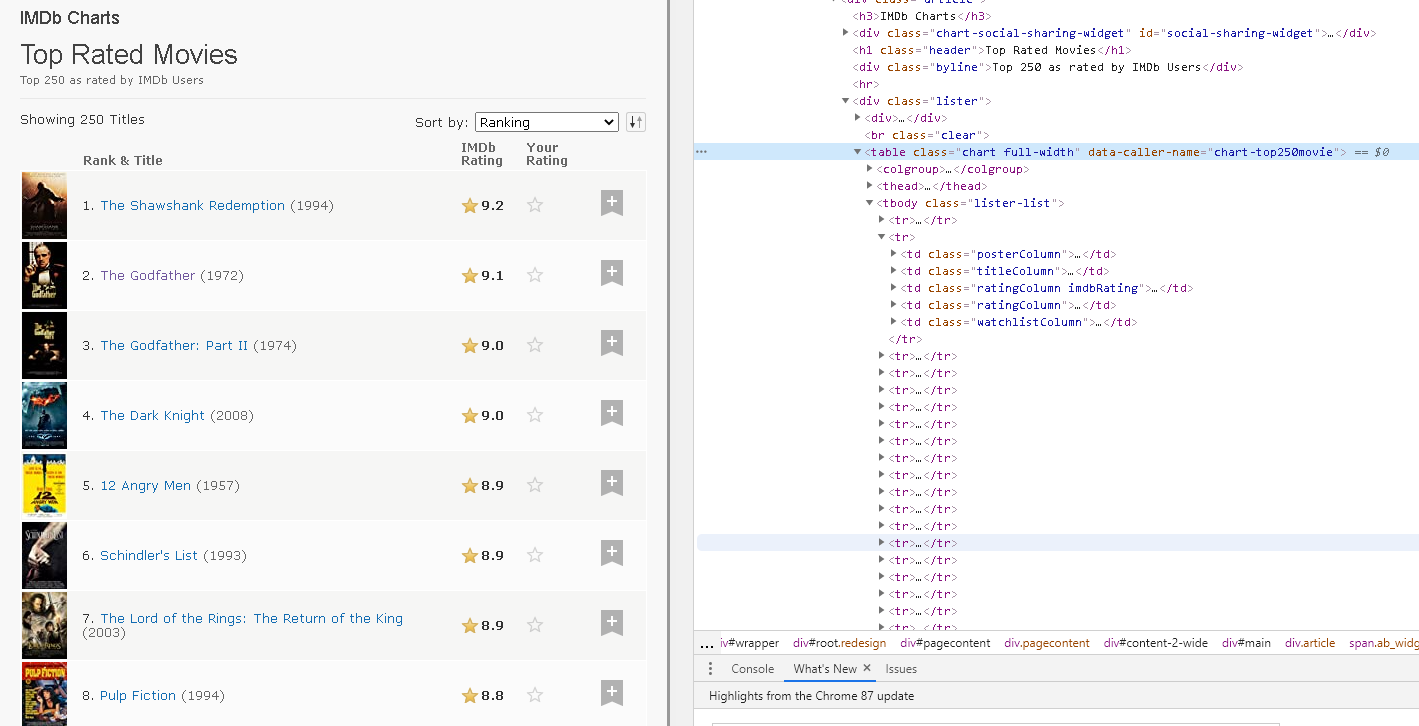

In [10]:
#Afficher Photo du page inspecter
from IPython.display import Image
Image("Inspecter tableau filme.png")

In [13]:
#Recuperer le code HTML du balise table
table_data = soup.find('table', 
            class_ = 'chart full-width')
#table_data

# récupération des en-têtes de colonnes
Nous allons utiliser la fonction find_all()
pour obtenir les en-têtes de colonne de la table. Ces en-têtes ont une étiquette **« th »**.

In [14]:
headers = []
for i in table_data.find_all('th'):
    title = i.text
    headers.append(title)

In [23]:
headers

['', 'Rank & Title', 'IMDb Rating', 'Your Rating', '']

### Création du dataframe
Créons une base de données vide avec la liste d’en-têtes comme noms de colonnes.

In [24]:
data = pd.DataFrame(columns= headers)
data

,,Rank & Title,IMDb Rating,Your Rating,


### Récupération des données du tableau

In [25]:
for j in table_data.find_all('tr')[1:]:
        row_data = j.find_all('td')
        row = [tr.text for tr in row_data]
        length = len(data)
        data.loc[length] = row

In [26]:
data

,,Rank & Title,IMDb Rating,Your Rating,
0,\n\n\n\n\n\n \n,\n 1.\n The Shawshank Redemption\n(1...,\n9.2\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n
1,\n\n\n\n\n\n \n,\n 2.\n The Godfather\n(1972)\n,\n9.1\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n
2,\n\n\n\n\n\n \n,\n 3.\n The Godfather: Part II\n(197...,\n9.0\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n
3,\n\n\n\n\n\n \n,\n 4.\n The Dark Knight\n(2008)\n,\n9.0\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n
4,\n\n\n\n\n\n \n,\n 5.\n 12 Angry Men\n(1957)\n,\n8.9\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n
...,...,...,...,...,...
245,\n\n\n\n\n\n \n,\n 246.\n Drishyam\n(2015)\n,\n8.0\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n
246,\n\n\n\n\n\n \n,\n 247.\n The Princess Bride\n(1987)\n,\n8.0\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n
247,\n\n\n\n\n\n \n,\n 248.\n La battaglia di Algeri\n(1...,\n8.0\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n
248,\n\n\n\n\n\n \n,\n 249.\n Mandariinid\n(2013)\n,\n8.0\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...,\n\n


In [27]:
data.columns

Index(['', 'Rank & Title', 'IMDb Rating', 'Your Rating', ''], dtype='object')

In [28]:
#Supprimer les colones vides
del data['']

In [29]:
#Verification 
data.columns

Index(['Rank & Title', 'IMDb Rating', 'Your Rating'], dtype='object')

In [31]:
data

,Rank & Title,IMDb Rating,Your Rating
0,\n 1.\n The Shawshank Redemption\n(1...,\n9.2\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...
1,\n 2.\n The Godfather\n(1972)\n,\n9.1\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...
2,\n 3.\n The Godfather: Part II\n(197...,\n9.0\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...
3,\n 4.\n The Dark Knight\n(2008)\n,\n9.0\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...
4,\n 5.\n 12 Angry Men\n(1957)\n,\n8.9\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...
...,...,...,...
245,\n 246.\n Drishyam\n(2015)\n,\n8.0\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...
246,\n 247.\n The Princess Bride\n(1987)\n,\n8.0\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...
247,\n 248.\n La battaglia di Algeri\n(1...,\n8.0\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...
248,\n 249.\n Mandariinid\n(2013)\n,\n8.0\n,\n\n\n\n 12345678910 \n\n\n\nNOT YET RELEASED\...


### Application du type string aux colonnes pour supprimer le "\n" 

In [47]:
data['Rank & Title'] = data['Rank & Title'].astype(str)
data['IMDb Rating'] = data['IMDb Rating'].astype(str)
data['Your Rating'] = data['Your Rating'].astype(str)

### Suppression des: \n des 3 colonnes et le chiffre "12345678910" 
### Application du type numérique

In [50]:
data['Rank & Title'] = data['Rank & Title'].str.replace('\n', '').astype(np.str)
data['IMDb Rating'] = data['IMDb Rating'].str.replace('\n', '').astype(np.str)
data['Your Rating'] = data['Your Rating'].str.replace('\n', '').astype(np.str)
data['Your Rating'] = data['Your Rating'].str.replace('12345678910', '').astype(np.str)

In [56]:
#Convertion le type str to float
data['IMDb Rating'] = data['IMDb Rating'].astype(float)

In [57]:
data

,Rank & Title,IMDb Rating,Your Rating
0,1. The Shawshank Redemption(1994),9.2,NOT YET RELEASED Seen
1,2. The Godfather(1972),9.1,NOT YET RELEASED Seen
2,3. The Godfather: Part II(1974),9.0,NOT YET RELEASED Seen
3,4. The Dark Knight(2008),9.0,NOT YET RELEASED Seen
4,5. 12 Angry Men(1957),8.9,NOT YET RELEASED Seen
...,...,...,...
245,246. Drishyam(2015),8.0,NOT YET RELEASED Seen
246,247. The Princess Bride(1987),8.0,NOT YET RELEASED Seen
247,248. La battaglia di Algeri(1966),8.0,NOT YET RELEASED Seen
248,249. Mandariinid(2013),8.0,NOT YET RELEASED Seen


### Sauvegarde des données

In [58]:
data.to_csv('Top_Rated_Movies.csv')